In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-25 10:11:46.262213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 10:11:46.262327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 10:11:46.389721: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/clean-1/cleaned_data.csv
/kaggle/input/glove-z/glove.42B.300d.txt
/kaggle/input/clean-2/new_cleaned_data.csv


In [3]:
df1=pd.read_csv("/kaggle/input/clean-1/cleaned_data.csv")
df2=pd.read_csv("/kaggle/input/clean-2/new_cleaned_data.csv")


In [4]:
df2.drop(columns=['Unnamed: 0'],inplace=True)
r_df=pd.concat([df1,df2],axis=0)


In [5]:
r_df.reset_index(inplace=True)

In [6]:
r_df.drop(columns=['index'],inplace=True)

In [7]:
r_df

,text,class,clean_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird do not get affect compliment come someon...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost never hear 2020 bad year e...
3,I took the rest of my sleeping pills and my pa...,suicide,take rest sleep pill painkillersi can t wait e...
4,Can you imagine getting old? Me neither.Wrinkl...,suicide,imagine get old neitherwrinkle weight gain hai...
...,...,...,...
224137,No hopeI contacted the suicide prevention hotl...,suicide,hopei contact suicide prevention hotline text ...
224138,"I'm going to try again. Please, SW, you may be...",suicide,go try please sw may last hopeive try kill 9 t...
224139,paralyzing anxiety &amp; depression are pushin...,suicide,paralyze anxiety amp depression push edge 20f ...
224140,I’m a fucking scummy person and I can’t change...,suicide,I m fucking scummy person can t change itever ...


In [ ]:
r_df.to_csv("all_cleaned_data.csv")

In [8]:
r_df['clean_text']=r_df['clean_text'].astype(str)

In [9]:
label_mapping = {'suicide': 1, 'non-suicide': 0}
r_df['label'] = r_df['class'].map(label_mapping)

In [14]:
r_df['label']

0         1
1         0
2         0
3         1
4         1
         ..
224137    1
224138    1
224139    1
224140    1
224141    1
Name: label, Length: 224142, dtype: int64

In [15]:
r_df['class']

0             suicide
1         non-suicide
2         non-suicide
3             suicide
4             suicide
             ...     
224137        suicide
224138        suicide
224139        suicide
224140        suicide
224141        suicide
Name: class, Length: 224142, dtype: object

In [ ]:
toknize=Tokenizer(oov_token="<OOV>")

In [10]:
toknize=Tokenizer(oov_token="<OOV>")
toknize.fit_on_texts(r_df['clean_text'])

sequences=toknize.texts_to_sequences(r_df['clean_text'])
# Get the word index
word_index = toknize.word_index

padded_seq= pad_sequences(sequences,maxlen=150,padding='post',truncating='post')


In [11]:
# Convert the embedded_list to a numpy array
embedded_array = np.array(padded_seq)

# Assuming 'labels' is your corresponding target variable (e.g., labels for binary classification)
# Replace this with your actual target variable
labels = np.array(r_df['label'])

# Split the data into training, testing, and validation sets
# Adjust the test_size and random_state as needed
train_data, test_data, train_labels, test_labels = train_test_split(embedded_array, labels, test_size=0.045, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.045, random_state=42)

In [18]:
r_df.head()

,text,class,clean_text,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...,1
1,Am I weird I don't get affected by compliments...,non-suicide,weird do not get affect compliment come someon...,0
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally 2020 almost never hear 2020 bad year e...,0
3,I took the rest of my sleeping pills and my pa...,suicide,take rest sleep pill painkillersi can t wait e...,1
4,Can you imagine getting old? Me neither.Wrinkl...,suicide,imagine get old neitherwrinkle weight gain hai...,1


In [19]:
train_data.shape

(204422, 150)

In [12]:

# Load GloVe embeddings
embedding_path = '/kaggle/input/glove-z/glove.42B.300d.txt'
embeddings_index = {}
with open(embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix
embedding_matrix = np.zeros((len(embeddings_index), 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



In [13]:
# Build Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(embeddings_index), output_dim=300, weights=[embedding_matrix], input_length=150, trainable=True))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))

# Set a custom learning rate for the Adam optimizer
custom_optimizer = Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          575248200 
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 575687753 (2.14 GB)
Trainable params: 575687753 (2.14 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.shape

In [ ]:
label

In [ ]:
r_df.loc[100000,'clean_text']

In [14]:
# Assuming you have X_train, y_train, val_data, and val_labels defined
model.fit(train_data, train_labels, epochs=1, batch_size=32, validation_data=(val_data, val_labels))

I0000 00:00:1708856337.965480     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1708856338.485301     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476306929 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   1/6389 [..............................] - ETA: 9:33:47 - loss: 0.6658 - accuracy: 0.5625

W0000 00:00:1708856338.786352     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476483074 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   2/6389 [..............................] - ETA: 31:20 - loss: 0.6563 - accuracy: 0.6250  

W0000 00:00:1708856339.080501     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476362975 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   3/6389 [..............................] - ETA: 31:24 - loss: 0.6495 - accuracy: 0.6458

W0000 00:00:1708856339.373296     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476465917 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   4/6389 [..............................] - ETA: 31:16 - loss: 0.6346 - accuracy: 0.6406

W0000 00:00:1708856339.664772     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476451048 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   5/6389 [..............................] - ETA: 31:20 - loss: 0.6432 - accuracy: 0.6062

W0000 00:00:1708856339.958247     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476581441 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   6/6389 [..............................] - ETA: 31:17 - loss: 0.6594 - accuracy: 0.5677

W0000 00:00:1708856340.255838     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476573434 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   7/6389 [..............................] - ETA: 31:26 - loss: 0.6531 - accuracy: 0.5893

W0000 00:00:1708856340.555576     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476467061 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   8/6389 [..............................] - ETA: 31:24 - loss: 0.6421 - accuracy: 0.6094

W0000 00:00:1708856340.850133     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476344674 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


   9/6389 [..............................] - ETA: 31:22 - loss: 0.6385 - accuracy: 0.6285

W0000 00:00:1708856341.142990     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476503663 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  10/6389 [..............................] - ETA: 31:25 - loss: 0.6272 - accuracy: 0.6438

W0000 00:00:1708856341.442495     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476489937 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  11/6389 [..............................] - ETA: 31:24 - loss: 0.6273 - accuracy: 0.6420

W0000 00:00:1708856341.748438     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476364119 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  12/6389 [..............................] - ETA: 31:45 - loss: 0.6184 - accuracy: 0.6406

W0000 00:00:1708856342.073570     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476138790 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  13/6389 [..............................] - ETA: 31:52 - loss: 0.6087 - accuracy: 0.6418

W0000 00:00:1708856342.398093     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476388139 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  14/6389 [..............................] - ETA: 31:59 - loss: 0.5948 - accuracy: 0.6607

W0000 00:00:1708856342.700390     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476353825 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  15/6389 [..............................] - ETA: 32:00 - loss: 0.5837 - accuracy: 0.6708

W0000 00:00:1708856343.000913     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476432747 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  16/6389 [..............................] - ETA: 31:59 - loss: 0.6034 - accuracy: 0.6641

W0000 00:00:1708856343.299109     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476298922 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  18/6389 [..............................] - ETA: 30:53 - loss: 0.5836 - accuracy: 0.6753

W0000 00:00:1708856343.726704     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476332093 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  19/6389 [..............................] - ETA: 31:01 - loss: 0.5767 - accuracy: 0.6793

W0000 00:00:1708856344.041289     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476399577 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  20/6389 [..............................] - ETA: 31:02 - loss: 0.5698 - accuracy: 0.6859

W0000 00:00:1708856344.338768     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476461342 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  21/6389 [..............................] - ETA: 31:05 - loss: 0.5631 - accuracy: 0.6949

W0000 00:00:1708856344.642531     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476523107 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  22/6389 [..............................] - ETA: 31:06 - loss: 0.5566 - accuracy: 0.7031

W0000 00:00:1708856344.936477     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476509382 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  23/6389 [..............................] - ETA: 31:06 - loss: 0.5497 - accuracy: 0.7079

W0000 00:00:1708856345.230449     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476352681 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  24/6389 [..............................] - ETA: 31:05 - loss: 0.5438 - accuracy: 0.7161

W0000 00:00:1708856345.525008     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476288628 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  25/6389 [..............................] - ETA: 31:06 - loss: 0.5464 - accuracy: 0.7150

W0000 00:00:1708856345.823633     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476354969 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  26/6389 [..............................] - ETA: 31:07 - loss: 0.5398 - accuracy: 0.7200

W0000 00:00:1708856346.120602     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476485362 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  27/6389 [..............................] - ETA: 31:07 - loss: 0.5374 - accuracy: 0.7222

W0000 00:00:1708856346.417074     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476365263 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  28/6389 [..............................] - ETA: 31:08 - loss: 0.5274 - accuracy: 0.7266

W0000 00:00:1708856346.712565     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476302354 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  30/6389 [..............................] - ETA: 30:31 - loss: 0.5129 - accuracy: 0.7354

W0000 00:00:1708856347.133460     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476428172 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  31/6389 [..............................] - ETA: 30:33 - loss: 0.5055 - accuracy: 0.7399

W0000 00:00:1708856347.432871     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476247451 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  32/6389 [..............................] - ETA: 30:34 - loss: 0.5057 - accuracy: 0.7432

W0000 00:00:1708856347.725954     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476594023 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  33/6389 [..............................] - ETA: 30:34 - loss: 0.5039 - accuracy: 0.7453

W0000 00:00:1708856348.017513     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476276046 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  34/6389 [..............................] - ETA: 30:35 - loss: 0.4987 - accuracy: 0.7491

W0000 00:00:1708856348.313363     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476439610 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  36/6389 [..............................] - ETA: 30:10 - loss: 0.4900 - accuracy: 0.7552

W0000 00:00:1708856348.753762     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476535689 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  37/6389 [..............................] - ETA: 30:11 - loss: 0.4867 - accuracy: 0.7559

W0000 00:00:1708856349.048351     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476544839 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  38/6389 [..............................] - ETA: 30:12 - loss: 0.4873 - accuracy: 0.7558

W0000 00:00:1708856349.344713     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476516244 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  39/6389 [..............................] - ETA: 30:14 - loss: 0.4859 - accuracy: 0.7572

W0000 00:00:1708856349.641195     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476415590 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  40/6389 [..............................] - ETA: 30:15 - loss: 0.4828 - accuracy: 0.7602

W0000 00:00:1708856349.932555     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476324086 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  41/6389 [..............................] - ETA: 30:16 - loss: 0.4780 - accuracy: 0.7637

W0000 00:00:1708856350.226795     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476390426 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  42/6389 [..............................] - ETA: 30:17 - loss: 0.4737 - accuracy: 0.7671

W0000 00:00:1708856350.525078     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476417878 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  43/6389 [..............................] - ETA: 30:18 - loss: 0.4719 - accuracy: 0.7682

W0000 00:00:1708856350.816565     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476413302 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  44/6389 [..............................] - ETA: 30:19 - loss: 0.4695 - accuracy: 0.7699

W0000 00:00:1708856351.110172     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476527682 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  47/6389 [..............................] - ETA: 29:35 - loss: 0.4611 - accuracy: 0.7753

W0000 00:00:1708856351.663994     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476261177 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  48/6389 [..............................] - ETA: 29:37 - loss: 0.4559 - accuracy: 0.7780

W0000 00:00:1708856351.956953     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476278334 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  49/6389 [..............................] - ETA: 29:39 - loss: 0.4561 - accuracy: 0.7787

W0000 00:00:1708856352.253191     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476469349 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  50/6389 [..............................] - ETA: 29:41 - loss: 0.4515 - accuracy: 0.7812

W0000 00:00:1708856352.553313     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476294347 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  51/6389 [..............................] - ETA: 29:42 - loss: 0.4501 - accuracy: 0.7819

W0000 00:00:1708856352.845157     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476427028 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  52/6389 [..............................] - ETA: 29:43 - loss: 0.4461 - accuracy: 0.7843

W0000 00:00:1708856353.139248     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476529970 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  53/6389 [..............................] - ETA: 29:45 - loss: 0.4414 - accuracy: 0.7871

W0000 00:00:1708856353.433941     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476381276 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  54/6389 [..............................] - ETA: 29:46 - loss: 0.4398 - accuracy: 0.7888

W0000 00:00:1708856353.727482     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476437322 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  55/6389 [..............................] - ETA: 29:49 - loss: 0.4382 - accuracy: 0.7898

W0000 00:00:1708856354.036350     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476420165 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  56/6389 [..............................] - ETA: 29:50 - loss: 0.4360 - accuracy: 0.7919

W0000 00:00:1708856354.333426     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476321798 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  57/6389 [..............................] - ETA: 29:52 - loss: 0.4331 - accuracy: 0.7939

W0000 00:00:1708856354.637243     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476359544 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  58/6389 [..............................] - ETA: 29:53 - loss: 0.4313 - accuracy: 0.7953

W0000 00:00:1708856354.929211     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476572291 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  59/6389 [..............................] - ETA: 29:54 - loss: 0.4305 - accuracy: 0.7971

W0000 00:00:1708856355.223657     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476472780 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  60/6389 [..............................] - ETA: 29:55 - loss: 0.4301 - accuracy: 0.7979

W0000 00:00:1708856355.520161     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476270327 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  61/6389 [..............................] - ETA: 29:56 - loss: 0.4263 - accuracy: 0.7992

W0000 00:00:1708856355.811870     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476412159 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  62/6389 [..............................] - ETA: 29:57 - loss: 0.4255 - accuracy: 0.7989

W0000 00:00:1708856356.109605     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476380132 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  63/6389 [..............................] - ETA: 29:58 - loss: 0.4265 - accuracy: 0.7981

W0000 00:00:1708856356.406936     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476310360 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  64/6389 [..............................] - ETA: 29:59 - loss: 0.4257 - accuracy: 0.7993

W0000 00:00:1708856356.705109     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476422453 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  65/6389 [..............................] - ETA: 30:00 - loss: 0.4223 - accuracy: 0.8010

W0000 00:00:1708856357.001139     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476230294 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  66/6389 [..............................] - ETA: 30:00 - loss: 0.4192 - accuracy: 0.8030

W0000 00:00:1708856357.295877     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476454479 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  67/6389 [..............................] - ETA: 30:02 - loss: 0.4181 - accuracy: 0.8046

W0000 00:00:1708856357.596792     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476475068 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  68/6389 [..............................] - ETA: 30:02 - loss: 0.4156 - accuracy: 0.8061

W0000 00:00:1708856357.889854     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476384707 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  69/6389 [..............................] - ETA: 30:03 - loss: 0.4160 - accuracy: 0.8066

W0000 00:00:1708856358.182870     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476334380 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  70/6389 [..............................] - ETA: 30:04 - loss: 0.4133 - accuracy: 0.8080

W0000 00:00:1708856358.482259     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476517388 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  71/6389 [..............................] - ETA: 30:04 - loss: 0.4141 - accuracy: 0.8072

W0000 00:00:1708856358.780412     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476488793 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  72/6389 [..............................] - ETA: 30:05 - loss: 0.4142 - accuracy: 0.8073

W0000 00:00:1708856359.074795     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476652357 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  73/6389 [..............................] - ETA: 30:05 - loss: 0.4130 - accuracy: 0.8078

W0000 00:00:1708856359.372607     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476414446 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  74/6389 [..............................] - ETA: 30:07 - loss: 0.4117 - accuracy: 0.8087

W0000 00:00:1708856359.674054     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476500231 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  75/6389 [..............................] - ETA: 30:07 - loss: 0.4123 - accuracy: 0.8083

W0000 00:00:1708856359.966311     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476570003 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  76/6389 [..............................] - ETA: 30:08 - loss: 0.4111 - accuracy: 0.8088

W0000 00:00:1708856360.264276     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476264608 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  77/6389 [..............................] - ETA: 30:09 - loss: 0.4109 - accuracy: 0.8093

W0000 00:00:1708856360.564174     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476515101 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  78/6389 [..............................] - ETA: 30:09 - loss: 0.4115 - accuracy: 0.8089

W0000 00:00:1708856360.859189     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476463630 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  80/6389 [..............................] - ETA: 29:56 - loss: 0.4111 - accuracy: 0.8090

W0000 00:00:1708856361.282334     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476400721 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  82/6389 [..............................] - ETA: 29:45 - loss: 0.4079 - accuracy: 0.8114

W0000 00:00:1708856361.710162     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476391570 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  84/6389 [..............................] - ETA: 29:33 - loss: 0.4049 - accuracy: 0.8129

W0000 00:00:1708856362.133288     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476513957 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  86/6389 [..............................] - ETA: 29:23 - loss: 0.4018 - accuracy: 0.8150

W0000 00:00:1708856362.559174     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476511669 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  87/6389 [..............................] - ETA: 29:23 - loss: 0.3999 - accuracy: 0.8165

W0000 00:00:1708856362.853116     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476369838 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  88/6389 [..............................] - ETA: 29:24 - loss: 0.3990 - accuracy: 0.8175

W0000 00:00:1708856363.148227     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476279478 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  90/6389 [..............................] - ETA: 29:14 - loss: 0.3956 - accuracy: 0.8194

W0000 00:00:1708856363.573204     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476398433 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  91/6389 [..............................] - ETA: 29:17 - loss: 0.3963 - accuracy: 0.8194

W0000 00:00:1708856363.898442     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476345818 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  94/6389 [..............................] - ETA: 28:57 - loss: 0.3948 - accuracy: 0.8198

W0000 00:00:1708856364.452946     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476440754 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  95/6389 [..............................] - ETA: 28:58 - loss: 0.3939 - accuracy: 0.8197

W0000 00:00:1708856364.747540     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476644350 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  96/6389 [..............................] - ETA: 28:59 - loss: 0.3915 - accuracy: 0.8210

W0000 00:00:1708856365.046073     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476582585 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  97/6389 [..............................] - ETA: 29:01 - loss: 0.3897 - accuracy: 0.8222

W0000 00:00:1708856365.349211     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476252027 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


  99/6389 [..............................] - ETA: 28:52 - loss: 0.3880 - accuracy: 0.8235

W0000 00:00:1708856365.777167     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476397289 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 100/6389 [..............................] - ETA: 28:53 - loss: 0.3876 - accuracy: 0.8238

W0000 00:00:1708856366.070972     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476389283 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 101/6389 [..............................] - ETA: 28:54 - loss: 0.3856 - accuracy: 0.8249

W0000 00:00:1708856366.371923     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476274903 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 103/6389 [..............................] - ETA: 28:46 - loss: 0.3845 - accuracy: 0.8255

W0000 00:00:1708856366.801979     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476316079 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 106/6389 [..............................] - ETA: 28:30 - loss: 0.3802 - accuracy: 0.8284

W0000 00:00:1708856367.364949     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476525395 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 107/6389 [..............................] - ETA: 28:31 - loss: 0.3793 - accuracy: 0.8289

W0000 00:00:1708856367.662029     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476508238 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 108/6389 [..............................] - ETA: 28:32 - loss: 0.3768 - accuracy: 0.8302

W0000 00:00:1708856367.955521     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476468205 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 109/6389 [..............................] - ETA: 28:33 - loss: 0.3748 - accuracy: 0.8311

W0000 00:00:1708856368.253473     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476319511 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 110/6389 [..............................] - ETA: 28:35 - loss: 0.3754 - accuracy: 0.8313

W0000 00:00:1708856368.555470     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476459054 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 111/6389 [..............................] - ETA: 28:36 - loss: 0.3739 - accuracy: 0.8322

W0000 00:00:1708856368.856295     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476497944 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 113/6389 [..............................] - ETA: 28:29 - loss: 0.3704 - accuracy: 0.8346

W0000 00:00:1708856369.284297     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476431603 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 115/6389 [..............................] - ETA: 28:22 - loss: 0.3691 - accuracy: 0.8348

W0000 00:00:1708856369.714592     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476556277 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 116/6389 [..............................] - ETA: 28:23 - loss: 0.3680 - accuracy: 0.8351

W0000 00:00:1708856370.009873     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476631768 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 119/6389 [..............................] - ETA: 28:08 - loss: 0.3649 - accuracy: 0.8372

W0000 00:00:1708856370.564200     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476493368 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 121/6389 [..............................] - ETA: 28:02 - loss: 0.3625 - accuracy: 0.8381

W0000 00:00:1708856370.989190     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476293203 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 122/6389 [..............................] - ETA: 28:03 - loss: 0.3610 - accuracy: 0.8386

W0000 00:00:1708856371.286788     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476393858 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 123/6389 [..............................] - ETA: 28:04 - loss: 0.3604 - accuracy: 0.8392

W0000 00:00:1708856371.587454     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476305785 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 124/6389 [..............................] - ETA: 28:05 - loss: 0.3598 - accuracy: 0.8397

W0000 00:00:1708856371.883020     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476395002 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 128/6389 [..............................] - ETA: 27:45 - loss: 0.3582 - accuracy: 0.8418

W0000 00:00:1708856372.568443     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476429316 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 129/6389 [..............................] - ETA: 27:46 - loss: 0.3565 - accuracy: 0.8425

W0000 00:00:1708856372.865029     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476314936 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 130/6389 [..............................] - ETA: 27:49 - loss: 0.3547 - accuracy: 0.8438

W0000 00:00:1708856373.195845     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476471636 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 133/6389 [..............................] - ETA: 27:39 - loss: 0.3529 - accuracy: 0.8442

W0000 00:00:1708856373.813167     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476326374 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 134/6389 [..............................] - ETA: 27:42 - loss: 0.3515 - accuracy: 0.8451

W0000 00:00:1708856374.128920     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476589448 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 135/6389 [..............................] - ETA: 27:43 - loss: 0.3507 - accuracy: 0.8456

W0000 00:00:1708856374.427766     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476404152 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 136/6389 [..............................] - ETA: 27:44 - loss: 0.3500 - accuracy: 0.8460

W0000 00:00:1708856374.725616     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476579153 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 137/6389 [..............................] - ETA: 27:45 - loss: 0.3485 - accuracy: 0.8469

W0000 00:00:1708856375.022807     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476208562 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 138/6389 [..............................] - ETA: 27:47 - loss: 0.3483 - accuracy: 0.8471

W0000 00:00:1708856375.320844     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476446473 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 140/6389 [..............................] - ETA: 27:41 - loss: 0.3475 - accuracy: 0.8478

W0000 00:00:1708856375.748379     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476505950 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 142/6389 [..............................] - ETA: 27:36 - loss: 0.3450 - accuracy: 0.8488

W0000 00:00:1708856376.174413     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476424740 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 143/6389 [..............................] - ETA: 27:37 - loss: 0.3445 - accuracy: 0.8492

W0000 00:00:1708856376.470600     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476536833 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 144/6389 [..............................] - ETA: 27:38 - loss: 0.3437 - accuracy: 0.8496

W0000 00:00:1708856376.769306     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476559709 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 145/6389 [..............................] - ETA: 27:39 - loss: 0.3440 - accuracy: 0.8496

W0000 00:00:1708856377.065133     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476282909 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 146/6389 [..............................] - ETA: 27:40 - loss: 0.3439 - accuracy: 0.8497

W0000 00:00:1708856377.361509     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476445329 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 150/6389 [..............................] - ETA: 27:24 - loss: 0.3421 - accuracy: 0.8512

W0000 00:00:1708856378.048400     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476351537 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 153/6389 [..............................] - ETA: 27:13 - loss: 0.3399 - accuracy: 0.8519

W0000 00:00:1708856378.604475     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476561996 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 154/6389 [..............................] - ETA: 27:14 - loss: 0.3405 - accuracy: 0.8517

W0000 00:00:1708856378.900721     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476406440 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 156/6389 [..............................] - ETA: 27:10 - loss: 0.3394 - accuracy: 0.8526

W0000 00:00:1708856379.341833     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476455623 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 159/6389 [..............................] - ETA: 27:01 - loss: 0.3378 - accuracy: 0.8538

W0000 00:00:1708856379.906768     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476449904 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 161/6389 [..............................] - ETA: 26:57 - loss: 0.3374 - accuracy: 0.8540

W0000 00:00:1708856380.332501     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476292060 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 162/6389 [..............................] - ETA: 26:58 - loss: 0.3373 - accuracy: 0.8542

W0000 00:00:1708856380.634381     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476433891 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 163/6389 [..............................] - ETA: 26:59 - loss: 0.3360 - accuracy: 0.8551

W0000 00:00:1708856380.930357     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476378988 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 166/6389 [..............................] - ETA: 26:50 - loss: 0.3347 - accuracy: 0.8556

W0000 00:00:1708856381.487155     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476396145 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 172/6389 [..............................] - ETA: 26:27 - loss: 0.3298 - accuracy: 0.8583

W0000 00:00:1708856382.434855     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476336668 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 173/6389 [..............................] - ETA: 26:28 - loss: 0.3292 - accuracy: 0.8586

W0000 00:00:1708856382.734584     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476520820 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 174/6389 [..............................] - ETA: 26:29 - loss: 0.3278 - accuracy: 0.8594

W0000 00:00:1708856383.033305     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476534545 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 177/6389 [..............................] - ETA: 26:21 - loss: 0.3250 - accuracy: 0.8609

W0000 00:00:1708856383.589852     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476284053 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 178/6389 [..............................] - ETA: 26:23 - loss: 0.3243 - accuracy: 0.8615

W0000 00:00:1708856383.896362     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476368694 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 181/6389 [..............................] - ETA: 26:15 - loss: 0.3221 - accuracy: 0.8624

W0000 00:00:1708856384.452909     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476342387 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 182/6389 [..............................] - ETA: 26:16 - loss: 0.3211 - accuracy: 0.8626

W0000 00:00:1708856384.746251     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476271471 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 185/6389 [..............................] - ETA: 26:08 - loss: 0.3202 - accuracy: 0.8628

W0000 00:00:1708856385.300190     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476430459 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 186/6389 [..............................] - ETA: 26:09 - loss: 0.3199 - accuracy: 0.8627

W0000 00:00:1708856385.596879     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476438466 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 187/6389 [..............................] - ETA: 26:10 - loss: 0.3188 - accuracy: 0.8633

W0000 00:00:1708856385.890244     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476361831 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 191/6389 [..............................] - ETA: 25:58 - loss: 0.3161 - accuracy: 0.8647

W0000 00:00:1708856386.571217     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476330949 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 192/6389 [..............................] - ETA: 26:00 - loss: 0.3151 - accuracy: 0.8649

W0000 00:00:1708856386.866536     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476456767 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 193/6389 [..............................] - ETA: 26:01 - loss: 0.3149 - accuracy: 0.8650

W0000 00:00:1708856387.164274     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476452192 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 195/6389 [..............................] - ETA: 25:58 - loss: 0.3139 - accuracy: 0.8651

W0000 00:00:1708856387.592037     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476436178 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 196/6389 [..............................] - ETA: 25:59 - loss: 0.3156 - accuracy: 0.8646

W0000 00:00:1708856387.890361     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476231438 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 197/6389 [..............................] - ETA: 26:00 - loss: 0.3143 - accuracy: 0.8653

W0000 00:00:1708856388.186962     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476441897 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 198/6389 [..............................] - ETA: 26:02 - loss: 0.3146 - accuracy: 0.8652

W0000 00:00:1708856388.486966     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476518532 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 204/6389 [..............................] - ETA: 25:43 - loss: 0.3125 - accuracy: 0.8661

W0000 00:00:1708856389.432043     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476639775 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 205/6389 [..............................] - ETA: 25:44 - loss: 0.3118 - accuracy: 0.8665

W0000 00:00:1708856389.729438     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476447616 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 206/6389 [..............................] - ETA: 25:45 - loss: 0.3115 - accuracy: 0.8667

W0000 00:00:1708856390.025683     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476476211 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 207/6389 [..............................] - ETA: 25:46 - loss: 0.3117 - accuracy: 0.8667

W0000 00:00:1708856390.321590     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476496800 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 209/6389 [..............................] - ETA: 25:44 - loss: 0.3110 - accuracy: 0.8669

W0000 00:00:1708856390.752814     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476494512 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 210/6389 [..............................] - ETA: 25:45 - loss: 0.3104 - accuracy: 0.8673

W0000 00:00:1708856391.049489     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476558565 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 214/6389 [>.............................] - ETA: 25:35 - loss: 0.3086 - accuracy: 0.8683

W0000 00:00:1708856391.735331     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476285197 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 216/6389 [>.............................] - ETA: 25:32 - loss: 0.3072 - accuracy: 0.8691

W0000 00:00:1708856392.165138     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476542552 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 217/6389 [>.............................] - ETA: 25:33 - loss: 0.3070 - accuracy: 0.8694

W0000 00:00:1708856392.463938     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476322942 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 218/6389 [>.............................] - ETA: 25:34 - loss: 0.3072 - accuracy: 0.8694

W0000 00:00:1708856392.757437     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476403008 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 221/6389 [>.............................] - ETA: 25:28 - loss: 0.3057 - accuracy: 0.8702

W0000 00:00:1708856393.318625     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476528826 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 222/6389 [>.............................] - ETA: 25:30 - loss: 0.3049 - accuracy: 0.8704

W0000 00:00:1708856393.628099     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476367550 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 225/6389 [>.............................] - ETA: 25:24 - loss: 0.3023 - accuracy: 0.8717

W0000 00:00:1708856394.192405     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476548271 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 227/6389 [>.............................] - ETA: 25:22 - loss: 0.3007 - accuracy: 0.8724

W0000 00:00:1708856394.618229     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476460198 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 231/6389 [>.............................] - ETA: 25:13 - loss: 0.2994 - accuracy: 0.8730

W0000 00:00:1708856395.302110     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476370982 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 234/6389 [>.............................] - ETA: 25:07 - loss: 0.2999 - accuracy: 0.8731

W0000 00:00:1708856395.859119     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476260033 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 236/6389 [>.............................] - ETA: 25:05 - loss: 0.2989 - accuracy: 0.8738

W0000 00:00:1708856396.281383     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476423597 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 238/6389 [>.............................] - ETA: 25:03 - loss: 0.2978 - accuracy: 0.8743

W0000 00:00:1708856396.709336     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476280622 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 239/6389 [>.............................] - ETA: 25:04 - loss: 0.2975 - accuracy: 0.8747

W0000 00:00:1708856397.003718     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476411015 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 240/6389 [>.............................] - ETA: 25:05 - loss: 0.2970 - accuracy: 0.8749

W0000 00:00:1708856397.313171     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476603173 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 241/6389 [>.............................] - ETA: 25:07 - loss: 0.2965 - accuracy: 0.8751

W0000 00:00:1708856397.616594     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476157091 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 245/6389 [>.............................] - ETA: 24:58 - loss: 0.2959 - accuracy: 0.8755

W0000 00:00:1708856398.296771     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476139934 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 246/6389 [>.............................] - ETA: 24:59 - loss: 0.2951 - accuracy: 0.8760

W0000 00:00:1708856398.594931     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476495656 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 247/6389 [>.............................] - ETA: 25:00 - loss: 0.2945 - accuracy: 0.8763

W0000 00:00:1708856398.889798     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476545983 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 251/6389 [>.............................] - ETA: 24:52 - loss: 0.2935 - accuracy: 0.8766

W0000 00:00:1708856399.570155     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476492225 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 252/6389 [>.............................] - ETA: 24:53 - loss: 0.2932 - accuracy: 0.8767

W0000 00:00:1708856399.868502     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476491081 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 253/6389 [>.............................] - ETA: 24:54 - loss: 0.2929 - accuracy: 0.8770

W0000 00:00:1708856400.164327     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476480787 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 254/6389 [>.............................] - ETA: 24:55 - loss: 0.2933 - accuracy: 0.8768

W0000 00:00:1708856400.459856     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476301210 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 256/6389 [>.............................] - ETA: 24:53 - loss: 0.2924 - accuracy: 0.8771

W0000 00:00:1708856400.885573     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476623762 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 259/6389 [>.............................] - ETA: 24:48 - loss: 0.2905 - accuracy: 0.8779

W0000 00:00:1708856401.440494     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476313792 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 261/6389 [>.............................] - ETA: 24:46 - loss: 0.2897 - accuracy: 0.8784

W0000 00:00:1708856401.871181     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476563140 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 264/6389 [>.............................] - ETA: 24:42 - loss: 0.2890 - accuracy: 0.8788

W0000 00:00:1708856402.436708     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476453335 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 272/6389 [>.............................] - ETA: 24:23 - loss: 0.2849 - accuracy: 0.8803

W0000 00:00:1708856403.639648     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476541408 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 273/6389 [>.............................] - ETA: 24:25 - loss: 0.2841 - accuracy: 0.8807

W0000 00:00:1708856403.944409     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476407583 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 274/6389 [>.............................] - ETA: 24:26 - loss: 0.2834 - accuracy: 0.8810

W0000 00:00:1708856404.249409     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476421309 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 275/6389 [>.............................] - ETA: 24:27 - loss: 0.2825 - accuracy: 0.8815

W0000 00:00:1708856404.564833     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476531114 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 276/6389 [>.............................] - ETA: 24:29 - loss: 0.2823 - accuracy: 0.8816

W0000 00:00:1708856404.877860     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476481930 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 277/6389 [>.............................] - ETA: 24:30 - loss: 0.2816 - accuracy: 0.8819

W0000 00:00:1708856405.179420     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476510525 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 280/6389 [>.............................] - ETA: 24:26 - loss: 0.2803 - accuracy: 0.8826

W0000 00:00:1708856405.737588     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476477355 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 281/6389 [>.............................] - ETA: 24:27 - loss: 0.2805 - accuracy: 0.8828

W0000 00:00:1708856406.035949     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476281765 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 286/6389 [>.............................] - ETA: 24:17 - loss: 0.2807 - accuracy: 0.8831

W0000 00:00:1708856406.845200     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476356112 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 288/6389 [>.............................] - ETA: 24:16 - loss: 0.2803 - accuracy: 0.8831

W0000 00:00:1708856407.276288     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476289772 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 290/6389 [>.............................] - ETA: 24:14 - loss: 0.2798 - accuracy: 0.8832

W0000 00:00:1708856407.709877     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476350393 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 296/6389 [>.............................] - ETA: 24:03 - loss: 0.2782 - accuracy: 0.8840

W0000 00:00:1708856408.655528     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476409871 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 297/6389 [>.............................] - ETA: 24:04 - loss: 0.2782 - accuracy: 0.8839

W0000 00:00:1708856408.950856     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476580297 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 299/6389 [>.............................] - ETA: 24:02 - loss: 0.2788 - accuracy: 0.8835

W0000 00:00:1708856409.381353     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476197124 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 302/6389 [>.............................] - ETA: 23:58 - loss: 0.2779 - accuracy: 0.8841

W0000 00:00:1708856409.938302     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476318367 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 304/6389 [>.............................] - ETA: 23:57 - loss: 0.2777 - accuracy: 0.8841

W0000 00:00:1708856410.368292     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476273759 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 305/6389 [>.............................] - ETA: 23:58 - loss: 0.2771 - accuracy: 0.8845

W0000 00:00:1708856410.669914     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476346962 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 306/6389 [>.............................] - ETA: 23:59 - loss: 0.2766 - accuracy: 0.8848

W0000 00:00:1708856410.967140     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5475998103 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 307/6389 [>.............................] - ETA: 24:00 - loss: 0.2766 - accuracy: 0.8848

W0000 00:00:1708856411.262645     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476215425 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 310/6389 [>.............................] - ETA: 23:56 - loss: 0.2761 - accuracy: 0.8850

W0000 00:00:1708856411.819864     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476253170 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 313/6389 [>.............................] - ETA: 23:53 - loss: 0.2757 - accuracy: 0.8853

W0000 00:00:1708856412.385305     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476327517 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 315/6389 [>.............................] - ETA: 23:52 - loss: 0.2751 - accuracy: 0.8856

W0000 00:00:1708856412.814519     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476419021 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 320/6389 [>.............................] - ETA: 23:43 - loss: 0.2742 - accuracy: 0.8862

W0000 00:00:1708856413.626203     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476457911 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 322/6389 [>.............................] - ETA: 23:42 - loss: 0.2738 - accuracy: 0.8864

W0000 00:00:1708856414.055905     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476648925 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 328/6389 [>.............................] - ETA: 23:32 - loss: 0.2728 - accuracy: 0.8866

W0000 00:00:1708856414.993891     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476479643 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 330/6389 [>.............................] - ETA: 23:31 - loss: 0.2724 - accuracy: 0.8869

W0000 00:00:1708856415.419369     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476613467 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 331/6389 [>.............................] - ETA: 23:32 - loss: 0.2718 - accuracy: 0.8872

W0000 00:00:1708856415.716081     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476470492 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 333/6389 [>.............................] - ETA: 23:31 - loss: 0.2714 - accuracy: 0.8874

W0000 00:00:1708856416.142692     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476549415 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 336/6389 [>.............................] - ETA: 23:27 - loss: 0.2708 - accuracy: 0.8877

W0000 00:00:1708856416.694544     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476408727 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 342/6389 [>.............................] - ETA: 23:18 - loss: 0.2701 - accuracy: 0.8882

W0000 00:00:1708856417.634566     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476608892 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 343/6389 [>.............................] - ETA: 23:19 - loss: 0.2697 - accuracy: 0.8884

W0000 00:00:1708856417.931235     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476533401 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 348/6389 [>.............................] - ETA: 23:12 - loss: 0.2674 - accuracy: 0.8897

W0000 00:00:1708856418.744945     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476425884 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 353/6389 [>.............................] - ETA: 23:05 - loss: 0.2668 - accuracy: 0.8900

W0000 00:00:1708856419.556844     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476659219 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 360/6389 [>.............................] - ETA: 22:54 - loss: 0.2659 - accuracy: 0.8905

W0000 00:00:1708856420.629284     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476521963 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 361/6389 [>.............................] - ETA: 22:55 - loss: 0.2656 - accuracy: 0.8907

W0000 00:00:1708856420.928490     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476464773 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 365/6389 [>.............................] - ETA: 22:50 - loss: 0.2644 - accuracy: 0.8912

W0000 00:00:1708856421.610941     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476358400 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 367/6389 [>.............................] - ETA: 22:49 - loss: 0.2635 - accuracy: 0.8916

W0000 00:00:1708856422.035820     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476435035 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 369/6389 [>.............................] - ETA: 22:48 - loss: 0.2631 - accuracy: 0.8919

W0000 00:00:1708856422.467930     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476240589 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 370/6389 [>.............................] - ETA: 22:49 - loss: 0.2629 - accuracy: 0.8919

W0000 00:00:1708856422.762372     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476258889 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 377/6389 [>.............................] - ETA: 22:39 - loss: 0.2627 - accuracy: 0.8921

W0000 00:00:1708856423.839378     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476416734 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 379/6389 [>.............................] - ETA: 22:39 - loss: 0.2624 - accuracy: 0.8922

W0000 00:00:1708856424.264991     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476486506 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 380/6389 [>.............................] - ETA: 22:40 - loss: 0.2623 - accuracy: 0.8922

W0000 00:00:1708856424.567045     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476333236 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 381/6389 [>.............................] - ETA: 22:40 - loss: 0.2619 - accuracy: 0.8924

W0000 00:00:1708856424.861748     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476543696 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 384/6389 [>.............................] - ETA: 22:38 - loss: 0.2615 - accuracy: 0.8927

W0000 00:00:1708856425.415893     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476478499 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 387/6389 [>.............................] - ETA: 22:35 - loss: 0.2606 - accuracy: 0.8931

W0000 00:00:1708856425.974014     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476290916 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 388/6389 [>.............................] - ETA: 22:36 - loss: 0.2605 - accuracy: 0.8931

W0000 00:00:1708856426.272364     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476524251 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 390/6389 [>.............................] - ETA: 22:35 - loss: 0.2599 - accuracy: 0.8933

W0000 00:00:1708856426.700992     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476401864 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 392/6389 [>.............................] - ETA: 22:35 - loss: 0.2593 - accuracy: 0.8936

W0000 00:00:1708856427.126921     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476377845 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 394/6389 [>.............................] - ETA: 22:34 - loss: 0.2600 - accuracy: 0.8933

W0000 00:00:1708856427.556393     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476584872 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 398/6389 [>.............................] - ETA: 22:29 - loss: 0.2604 - accuracy: 0.8933

W0000 00:00:1708856428.239429     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476268040 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 400/6389 [>.............................] - ETA: 22:29 - loss: 0.2598 - accuracy: 0.8937

W0000 00:00:1708856428.672925     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476462486 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 402/6389 [>.............................] - ETA: 22:28 - loss: 0.2591 - accuracy: 0.8941

W0000 00:00:1708856429.103745     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476357256 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 404/6389 [>.............................] - ETA: 22:27 - loss: 0.2591 - accuracy: 0.8942

W0000 00:00:1708856429.527891     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476295491 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 405/6389 [>.............................] - ETA: 22:28 - loss: 0.2593 - accuracy: 0.8941

W0000 00:00:1708856429.824997     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476567715 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 406/6389 [>.............................] - ETA: 22:29 - loss: 0.2596 - accuracy: 0.8939

W0000 00:00:1708856430.123126     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476311504 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 407/6389 [>.............................] - ETA: 22:30 - loss: 0.2600 - accuracy: 0.8939

W0000 00:00:1708856430.421420     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476296635 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 409/6389 [>.............................] - ETA: 22:29 - loss: 0.2603 - accuracy: 0.8939

W0000 00:00:1708856430.847141     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476170817 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 411/6389 [>.............................] - ETA: 22:28 - loss: 0.2605 - accuracy: 0.8938

W0000 00:00:1708856431.270296     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476484218 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 413/6389 [>.............................] - ETA: 22:27 - loss: 0.2602 - accuracy: 0.8941

W0000 00:00:1708856431.700466     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476366407 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 420/6389 [>.............................] - ETA: 22:18 - loss: 0.2596 - accuracy: 0.8942

W0000 00:00:1708856432.771087     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476155947 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 428/6389 [=>............................] - ETA: 22:08 - loss: 0.2580 - accuracy: 0.8949

W0000 00:00:1708856433.971201     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476348106 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 429/6389 [=>............................] - ETA: 22:09 - loss: 0.2584 - accuracy: 0.8949

W0000 00:00:1708856434.275314     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476162810 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 430/6389 [=>............................] - ETA: 22:10 - loss: 0.2582 - accuracy: 0.8950

W0000 00:00:1708856434.576079     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476443041 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 431/6389 [=>............................] - ETA: 22:11 - loss: 0.2579 - accuracy: 0.8952

W0000 00:00:1708856434.873806     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476392714 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 434/6389 [=>............................] - ETA: 22:09 - loss: 0.2578 - accuracy: 0.8954

W0000 00:00:1708856435.446881     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476254314 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 442/6389 [=>............................] - ETA: 22:00 - loss: 0.2559 - accuracy: 0.8964

W0000 00:00:1708856436.672428     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476360688 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 443/6389 [=>............................] - ETA: 22:00 - loss: 0.2556 - accuracy: 0.8966

W0000 00:00:1708856436.967008     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476249739 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 445/6389 [=>............................] - ETA: 22:00 - loss: 0.2549 - accuracy: 0.8970

W0000 00:00:1708856437.392364     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476376701 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 447/6389 [=>............................] - ETA: 21:59 - loss: 0.2544 - accuracy: 0.8971

W0000 00:00:1708856437.818842     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476097614 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 449/6389 [=>............................] - ETA: 21:58 - loss: 0.2537 - accuracy: 0.8974

W0000 00:00:1708856438.244880     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476507094 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 453/6389 [=>............................] - ETA: 21:55 - loss: 0.2525 - accuracy: 0.8978

W0000 00:00:1708856438.932070     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476586016 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 458/6389 [=>............................] - ETA: 21:50 - loss: 0.2527 - accuracy: 0.8978

W0000 00:00:1708856439.749467     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476448760 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 461/6389 [=>............................] - ETA: 21:48 - loss: 0.2521 - accuracy: 0.8981

W0000 00:00:1708856440.328857     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476602029 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 463/6389 [=>............................] - ETA: 21:48 - loss: 0.2519 - accuracy: 0.8982

W0000 00:00:1708856440.767933     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476248595 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 467/6389 [=>............................] - ETA: 21:44 - loss: 0.2515 - accuracy: 0.8983

W0000 00:00:1708856441.459438     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476444185 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 468/6389 [=>............................] - ETA: 21:45 - loss: 0.2514 - accuracy: 0.8984

W0000 00:00:1708856441.755834     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476303498 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 471/6389 [=>............................] - ETA: 21:43 - loss: 0.2505 - accuracy: 0.8989

W0000 00:00:1708856442.310768     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476473924 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 477/6389 [=>............................] - ETA: 21:37 - loss: 0.2498 - accuracy: 0.8992

W0000 00:00:1708856443.254823     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476341243 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 480/6389 [=>............................] - ETA: 21:35 - loss: 0.2494 - accuracy: 0.8994

W0000 00:00:1708856443.823297     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476160523 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 482/6389 [=>............................] - ETA: 21:35 - loss: 0.2488 - accuracy: 0.8997

W0000 00:00:1708856444.252865     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476338955 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 484/6389 [=>............................] - ETA: 21:34 - loss: 0.2487 - accuracy: 0.8999

W0000 00:00:1708856444.681489     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476328661 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 491/6389 [=>............................] - ETA: 21:27 - loss: 0.2483 - accuracy: 0.9005

W0000 00:00:1708856445.755134     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476375557 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 493/6389 [=>............................] - ETA: 21:27 - loss: 0.2477 - accuracy: 0.9007

W0000 00:00:1708856446.183069     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476501375 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 494/6389 [=>............................] - ETA: 21:27 - loss: 0.2474 - accuracy: 0.9007

W0000 00:00:1708856446.479844     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476329805 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 497/6389 [=>............................] - ETA: 21:25 - loss: 0.2468 - accuracy: 0.9011

W0000 00:00:1708856447.034463     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476504806 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 502/6389 [=>............................] - ETA: 21:21 - loss: 0.2459 - accuracy: 0.9016

W0000 00:00:1708856447.849040     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476325230 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 504/6389 [=>............................] - ETA: 21:21 - loss: 0.2456 - accuracy: 0.9017

W0000 00:00:1708856448.276784     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476304641 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 505/6389 [=>............................] - ETA: 21:21 - loss: 0.2455 - accuracy: 0.9017

W0000 00:00:1708856448.573719     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476588304 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 510/6389 [=>............................] - ETA: 21:17 - loss: 0.2441 - accuracy: 0.9023

W0000 00:00:1708856449.389530     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476300066 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 520/6389 [=>............................] - ETA: 21:07 - loss: 0.2434 - accuracy: 0.9029

W0000 00:00:1708856450.847190     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476614611 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 523/6389 [=>............................] - ETA: 21:05 - loss: 0.2433 - accuracy: 0.9030

W0000 00:00:1708856451.405259     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476383564 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 525/6389 [=>............................] - ETA: 21:05 - loss: 0.2429 - accuracy: 0.9031

W0000 00:00:1708856451.831081     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476277190 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 526/6389 [=>............................] - ETA: 21:05 - loss: 0.2428 - accuracy: 0.9031

W0000 00:00:1708856452.131501     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476487649 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 528/6389 [=>............................] - ETA: 21:05 - loss: 0.2429 - accuracy: 0.9031

W0000 00:00:1708856452.559475     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476557421 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 530/6389 [=>............................] - ETA: 21:04 - loss: 0.2425 - accuracy: 0.9031

W0000 00:00:1708856452.987609     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476256602 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 534/6389 [=>............................] - ETA: 21:02 - loss: 0.2419 - accuracy: 0.9034

W0000 00:00:1708856453.671564     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476583729 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 535/6389 [=>............................] - ETA: 21:02 - loss: 0.2417 - accuracy: 0.9035

W0000 00:00:1708856453.993750     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476499087 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 569/6389 [=>............................] - ETA: 20:27 - loss: 0.2368 - accuracy: 0.9054

W0000 00:00:1708856458.553143     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476263465 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 574/6389 [=>............................] - ETA: 20:23 - loss: 0.2358 - accuracy: 0.9058

W0000 00:00:1708856459.369413     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476343531 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 585/6389 [=>............................] - ETA: 20:14 - loss: 0.2343 - accuracy: 0.9062

W0000 00:00:1708856460.959645     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476532258 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 590/6389 [=>............................] - ETA: 20:10 - loss: 0.2334 - accuracy: 0.9064

W0000 00:00:1708856461.772432     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476385851 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 591/6389 [=>............................] - ETA: 20:11 - loss: 0.2333 - accuracy: 0.9065

W0000 00:00:1708856462.068360     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476373269 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 593/6389 [=>............................] - ETA: 20:11 - loss: 0.2330 - accuracy: 0.9065

W0000 00:00:1708856462.495872     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476349250 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 594/6389 [=>............................] - ETA: 20:11 - loss: 0.2329 - accuracy: 0.9066

W0000 00:00:1708856462.794972     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476161666 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 595/6389 [=>............................] - ETA: 20:12 - loss: 0.2328 - accuracy: 0.9067

W0000 00:00:1708856463.090477     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476502519 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 596/6389 [=>............................] - ETA: 20:13 - loss: 0.2326 - accuracy: 0.9068

W0000 00:00:1708856463.393494     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476382420 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 601/6389 [=>............................] - ETA: 20:09 - loss: 0.2319 - accuracy: 0.9070

W0000 00:00:1708856464.214003     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476320655 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 617/6389 [=>............................] - ETA: 19:56 - loss: 0.2291 - accuracy: 0.9084

W0000 00:00:1708856466.457140     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476337812 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 632/6389 [=>............................] - ETA: 19:44 - loss: 0.2273 - accuracy: 0.9091

W0000 00:00:1708856468.608100     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476386995 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 637/6389 [=>............................] - ETA: 19:41 - loss: 0.2264 - accuracy: 0.9095

W0000 00:00:1708856469.423506     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476405296 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 644/6389 [==>...........................] - ETA: 19:36 - loss: 0.2250 - accuracy: 0.9102

W0000 00:00:1708856470.497060     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476340099 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 655/6389 [==>...........................] - ETA: 19:28 - loss: 0.2228 - accuracy: 0.9110

W0000 00:00:1708856472.085549     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476262321 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 674/6389 [==>...........................] - ETA: 19:14 - loss: 0.2205 - accuracy: 0.9120

W0000 00:00:1708856474.710491     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476272615 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 678/6389 [==>...........................] - ETA: 19:12 - loss: 0.2204 - accuracy: 0.9121

W0000 00:00:1708856475.400036     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476552846 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 679/6389 [==>...........................] - ETA: 19:13 - loss: 0.2202 - accuracy: 0.9121

W0000 00:00:1708856475.708365     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476637487 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 681/6389 [==>...........................] - ETA: 19:13 - loss: 0.2200 - accuracy: 0.9122

W0000 00:00:1708856476.153484     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476372126 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 693/6389 [==>...........................] - ETA: 19:04 - loss: 0.2188 - accuracy: 0.9126

W0000 00:00:1708856477.871036     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476626049 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 705/6389 [==>...........................] - ETA: 18:56 - loss: 0.2169 - accuracy: 0.9134

W0000 00:00:1708856479.597971     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476287484 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 713/6389 [==>...........................] - ETA: 18:52 - loss: 0.2160 - accuracy: 0.9137

W0000 00:00:1708856480.800110     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476178823 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 714/6389 [==>...........................] - ETA: 18:52 - loss: 0.2159 - accuracy: 0.9138

W0000 00:00:1708856481.097779     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476236013 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 716/6389 [==>...........................] - ETA: 18:52 - loss: 0.2156 - accuracy: 0.9139

W0000 00:00:1708856481.522886     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476242876 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 728/6389 [==>...........................] - ETA: 18:44 - loss: 0.2142 - accuracy: 0.9144

W0000 00:00:1708856483.243788     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476539120 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 746/6389 [==>...........................] - ETA: 18:33 - loss: 0.2126 - accuracy: 0.9151

W0000 00:00:1708856485.747602     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476317223 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 748/6389 [==>...........................] - ETA: 18:33 - loss: 0.2122 - accuracy: 0.9153

W0000 00:00:1708856486.175308     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476568859 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 758/6389 [==>...........................] - ETA: 18:27 - loss: 0.2112 - accuracy: 0.9158

W0000 00:00:1708856487.636706     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476200556 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 767/6389 [==>...........................] - ETA: 18:22 - loss: 0.2098 - accuracy: 0.9165

W0000 00:00:1708856488.969662     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476250883 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 794/6389 [==>...........................] - ETA: 18:05 - loss: 0.2067 - accuracy: 0.9176

W0000 00:00:1708856492.628210     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476670657 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 800/6389 [==>...........................] - ETA: 18:02 - loss: 0.2062 - accuracy: 0.9178

W0000 00:00:1708856493.576195     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476266896 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 802/6389 [==>...........................] - ETA: 18:02 - loss: 0.2062 - accuracy: 0.9178

W0000 00:00:1708856494.017014     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476555134 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 811/6389 [==>...........................] - ETA: 17:58 - loss: 0.2052 - accuracy: 0.9183

W0000 00:00:1708856495.353047     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476241732 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 819/6389 [==>...........................] - ETA: 17:54 - loss: 0.2045 - accuracy: 0.9186

W0000 00:00:1708856496.556680     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476257746 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 831/6389 [==>...........................] - ETA: 17:48 - loss: 0.2032 - accuracy: 0.9191

W0000 00:00:1708856498.290310     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476553990 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 840/6389 [==>...........................] - ETA: 17:43 - loss: 0.2020 - accuracy: 0.9196

W0000 00:00:1708856499.628263     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476547127 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 843/6389 [==>...........................] - ETA: 17:43 - loss: 0.2019 - accuracy: 0.9197

W0000 00:00:1708856500.184468     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476560853 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 859/6389 [===>..........................] - ETA: 17:34 - loss: 0.2005 - accuracy: 0.9203

W0000 00:00:1708856502.425368     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476143366 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 875/6389 [===>..........................] - ETA: 17:26 - loss: 0.1984 - accuracy: 0.9211

W0000 00:00:1708856504.660094     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476635200 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 886/6389 [===>..........................] - ETA: 17:21 - loss: 0.1977 - accuracy: 0.9213

W0000 00:00:1708856506.248787     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476173104 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 898/6389 [===>..........................] - ETA: 17:15 - loss: 0.1963 - accuracy: 0.9219

W0000 00:00:1708856507.967474     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476630624 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 904/6389 [===>..........................] - ETA: 17:13 - loss: 0.1955 - accuracy: 0.9222

W0000 00:00:1708856508.910080     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476269184 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 932/6389 [===>..........................] - ETA: 16:59 - loss: 0.1924 - accuracy: 0.9237

W0000 00:00:1708856512.691058     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476065587 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 935/6389 [===>..........................] - ETA: 16:58 - loss: 0.1922 - accuracy: 0.9238

W0000 00:00:1708856513.245641     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476308073 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 936/6389 [===>..........................] - ETA: 16:59 - loss: 0.1921 - accuracy: 0.9238

W0000 00:00:1708856513.544818     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476312648 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 958/6389 [===>..........................] - ETA: 16:48 - loss: 0.1901 - accuracy: 0.9245

W0000 00:00:1708856516.562929     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476598598 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


 987/6389 [===>..........................] - ETA: 16:35 - loss: 0.1873 - accuracy: 0.9258

W0000 00:00:1708856520.466118     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476565428 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1006/6389 [===>..........................] - ETA: 16:27 - loss: 0.1858 - accuracy: 0.9266

W0000 00:00:1708856523.087541     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476234870 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1009/6389 [===>..........................] - ETA: 16:26 - loss: 0.1858 - accuracy: 0.9265

W0000 00:00:1708856523.652041     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476246308 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1016/6389 [===>..........................] - ETA: 16:24 - loss: 0.1851 - accuracy: 0.9269

W0000 00:00:1708856524.751171     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476194837 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1021/6389 [===>..........................] - ETA: 16:23 - loss: 0.1848 - accuracy: 0.9271

W0000 00:00:1708856525.567869     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476265752 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1024/6389 [===>..........................] - ETA: 16:22 - loss: 0.1845 - accuracy: 0.9272

W0000 00:00:1708856526.124449     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476597454 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1025/6389 [===>..........................] - ETA: 16:22 - loss: 0.1845 - accuracy: 0.9272

W0000 00:00:1708856526.420599     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476374413 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1055/6389 [===>..........................] - ETA: 16:10 - loss: 0.1813 - accuracy: 0.9285

W0000 00:00:1708856530.478125     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476537977 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1056/6389 [===>..........................] - ETA: 16:10 - loss: 0.1812 - accuracy: 0.9285

W0000 00:00:1708856530.774538     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476575722 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1076/6389 [====>.........................] - ETA: 16:02 - loss: 0.1800 - accuracy: 0.9290

W0000 00:00:1708856533.528621     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476223432 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1090/6389 [====>.........................] - ETA: 15:57 - loss: 0.1789 - accuracy: 0.9295

W0000 00:00:1708856535.508739     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476578010 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1096/6389 [====>.........................] - ETA: 15:55 - loss: 0.1787 - accuracy: 0.9296

W0000 00:00:1708856536.450972     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476199412 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1111/6389 [====>.........................] - ETA: 15:49 - loss: 0.1773 - accuracy: 0.9301

W0000 00:00:1708856538.556615     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476564284 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1112/6389 [====>.........................] - ETA: 15:50 - loss: 0.1773 - accuracy: 0.9301

W0000 00:00:1708856538.855633     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476335524 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1123/6389 [====>.........................] - ETA: 15:46 - loss: 0.1766 - accuracy: 0.9304

W0000 00:00:1708856540.445460     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476628337 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1126/6389 [====>.........................] - ETA: 15:46 - loss: 0.1764 - accuracy: 0.9305

W0000 00:00:1708856541.002960     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476190261 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1132/6389 [====>.........................] - ETA: 15:44 - loss: 0.1761 - accuracy: 0.9306

W0000 00:00:1708856541.945138     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476226863 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1152/6389 [====>.........................] - ETA: 15:36 - loss: 0.1746 - accuracy: 0.9312

W0000 00:00:1708856544.711291     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476551702 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1153/6389 [====>.........................] - ETA: 15:37 - loss: 0.1746 - accuracy: 0.9312

W0000 00:00:1708856545.008224     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476297779 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1159/6389 [====>.........................] - ETA: 15:35 - loss: 0.1739 - accuracy: 0.9314

W0000 00:00:1708856545.952719     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476590591 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1179/6389 [====>.........................] - ETA: 15:28 - loss: 0.1726 - accuracy: 0.9320

W0000 00:00:1708856548.702631     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476620330 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1211/6389 [====>.........................] - ETA: 15:16 - loss: 0.1703 - accuracy: 0.9330

W0000 00:00:1708856553.004485     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476621474 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1215/6389 [====>.........................] - ETA: 15:15 - loss: 0.1701 - accuracy: 0.9331

W0000 00:00:1708856553.692183     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476245164 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1221/6389 [====>.........................] - ETA: 15:14 - loss: 0.1699 - accuracy: 0.9332

W0000 00:00:1708856554.659033     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476595167 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1243/6389 [====>.........................] - ETA: 15:06 - loss: 0.1687 - accuracy: 0.9338

W0000 00:00:1708856557.667014     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476519676 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1246/6389 [====>.........................] - ETA: 15:06 - loss: 0.1685 - accuracy: 0.9338

W0000 00:00:1708856558.225100     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476571147 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1260/6389 [====>.........................] - ETA: 15:02 - loss: 0.1677 - accuracy: 0.9342

W0000 00:00:1708856560.216932     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476176536 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1281/6389 [=====>........................] - ETA: 14:55 - loss: 0.1664 - accuracy: 0.9346

W0000 00:00:1708856563.112280     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476237157 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1328/6389 [=====>........................] - ETA: 14:39 - loss: 0.1632 - accuracy: 0.9359

W0000 00:00:1708856569.362807     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476209706 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1341/6389 [=====>........................] - ETA: 14:35 - loss: 0.1625 - accuracy: 0.9362

W0000 00:00:1708856571.210929     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476550558 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1368/6389 [=====>........................] - ETA: 14:27 - loss: 0.1611 - accuracy: 0.9368

W0000 00:00:1708856574.868074     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476606605 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1404/6389 [=====>........................] - ETA: 14:15 - loss: 0.1594 - accuracy: 0.9375

W0000 00:00:1708856579.680363     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476512813 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1440/6389 [=====>........................] - ETA: 14:05 - loss: 0.1579 - accuracy: 0.9382

W0000 00:00:1708856584.505244     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476540264 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1452/6389 [=====>........................] - ETA: 14:01 - loss: 0.1573 - accuracy: 0.9384

W0000 00:00:1708856586.220766     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476222288 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1453/6389 [=====>........................] - ETA: 14:02 - loss: 0.1572 - accuracy: 0.9384

W0000 00:00:1708856586.520878     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476612324 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1456/6389 [=====>........................] - ETA: 14:01 - loss: 0.1571 - accuracy: 0.9385

W0000 00:00:1708856587.075075     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476244020 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1473/6389 [=====>........................] - ETA: 13:57 - loss: 0.1565 - accuracy: 0.9389

W0000 00:00:1708856589.440931     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476596310 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1481/6389 [=====>........................] - ETA: 13:55 - loss: 0.1562 - accuracy: 0.9390

W0000 00:00:1708856590.640434     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476152516 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1482/6389 [=====>........................] - ETA: 13:55 - loss: 0.1562 - accuracy: 0.9390

W0000 00:00:1708856590.936841     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476217713 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1488/6389 [=====>........................] - ETA: 13:54 - loss: 0.1560 - accuracy: 0.9391

W0000 00:00:1708856591.920255     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476216569 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1489/6389 [=====>........................] - ETA: 13:54 - loss: 0.1560 - accuracy: 0.9391

W0000 00:00:1708856592.221818     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476309217 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1506/6389 [======>.......................] - ETA: 13:49 - loss: 0.1552 - accuracy: 0.9394

W0000 00:00:1708856594.596580     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476650069 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1508/6389 [======>.......................] - ETA: 13:49 - loss: 0.1551 - accuracy: 0.9394

W0000 00:00:1708856595.025405     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476605461 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1518/6389 [======>.......................] - ETA: 13:47 - loss: 0.1548 - accuracy: 0.9396

W0000 00:00:1708856596.486508     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476207418 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1525/6389 [======>.......................] - ETA: 13:45 - loss: 0.1545 - accuracy: 0.9397

W0000 00:00:1708856597.557930     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476186830 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1541/6389 [======>.......................] - ETA: 13:41 - loss: 0.1535 - accuracy: 0.9401

W0000 00:00:1708856599.787465     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476638631 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1546/6389 [======>.......................] - ETA: 13:40 - loss: 0.1533 - accuracy: 0.9402

W0000 00:00:1708856600.603002     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476221144 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1552/6389 [======>.......................] - ETA: 13:39 - loss: 0.1532 - accuracy: 0.9403

W0000 00:00:1708856601.543587     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476680952 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1555/6389 [======>.......................] - ETA: 13:39 - loss: 0.1531 - accuracy: 0.9403

W0000 00:00:1708856602.102920     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476576866 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1592/6389 [======>.......................] - ETA: 13:28 - loss: 0.1510 - accuracy: 0.9411

W0000 00:00:1708856607.054906     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476224575 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1614/6389 [======>.......................] - ETA: 13:23 - loss: 0.1501 - accuracy: 0.9415

W0000 00:00:1708856610.063868     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476627193 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1633/6389 [======>.......................] - ETA: 13:18 - loss: 0.1493 - accuracy: 0.9418

W0000 00:00:1708856612.688848     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476195980 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1637/6389 [======>.......................] - ETA: 13:17 - loss: 0.1491 - accuracy: 0.9419

W0000 00:00:1708856613.373304     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476184542 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1645/6389 [======>.......................] - ETA: 13:15 - loss: 0.1487 - accuracy: 0.9422

W0000 00:00:1708856614.586349     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476642062 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1648/6389 [======>.......................] - ETA: 13:15 - loss: 0.1487 - accuracy: 0.9422

W0000 00:00:1708856615.141949     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476147941 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1680/6389 [======>.......................] - ETA: 13:07 - loss: 0.1476 - accuracy: 0.9427

W0000 00:00:1708856619.437804     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476189118 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1689/6389 [======>.......................] - ETA: 13:05 - loss: 0.1470 - accuracy: 0.9429

W0000 00:00:1708856620.765384     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476600886 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1707/6389 [=======>......................] - ETA: 13:00 - loss: 0.1464 - accuracy: 0.9432

W0000 00:00:1708856623.278940     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476099901 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1711/6389 [=======>......................] - ETA: 13:00 - loss: 0.1463 - accuracy: 0.9432

W0000 00:00:1708856623.969514     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476163954 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1739/6389 [=======>......................] - ETA: 12:53 - loss: 0.1452 - accuracy: 0.9437

W0000 00:00:1708856627.756029     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476636343 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1767/6389 [=======>......................] - ETA: 12:46 - loss: 0.1444 - accuracy: 0.9440

W0000 00:00:1708856631.537530     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476213137 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1895/6389 [=======>......................] - ETA: 12:14 - loss: 0.1398 - accuracy: 0.9457

W0000 00:00:1708856648.225210     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476203987 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1899/6389 [=======>......................] - ETA: 12:13 - loss: 0.1397 - accuracy: 0.9457

W0000 00:00:1708856648.916958     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476181111 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1928/6389 [========>.....................] - ETA: 12:07 - loss: 0.1385 - accuracy: 0.9463

W0000 00:00:1708856652.825437     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476587160 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1948/6389 [========>.....................] - ETA: 12:02 - loss: 0.1379 - accuracy: 0.9465

W0000 00:00:1708856655.609589     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476202843 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1950/6389 [========>.....................] - ETA: 12:02 - loss: 0.1378 - accuracy: 0.9465

W0000 00:00:1708856656.049809     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476255458 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1955/6389 [========>.....................] - ETA: 12:01 - loss: 0.1378 - accuracy: 0.9465

W0000 00:00:1708856656.866561     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476591735 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1959/6389 [========>.....................] - ETA: 12:01 - loss: 0.1378 - accuracy: 0.9466

W0000 00:00:1708856657.555327     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476179967 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


1971/6389 [========>.....................] - ETA: 11:58 - loss: 0.1376 - accuracy: 0.9466

W0000 00:00:1708856659.274510     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476574578 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2007/6389 [========>.....................] - ETA: 11:50 - loss: 0.1372 - accuracy: 0.9468

W0000 00:00:1708856664.100381     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476624905 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2047/6389 [========>.....................] - ETA: 11:41 - loss: 0.1361 - accuracy: 0.9474

W0000 00:00:1708856669.432095     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476191405 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2114/6389 [========>.....................] - ETA: 11:26 - loss: 0.1344 - accuracy: 0.9482

W0000 00:00:1708856678.256937     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476205131 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2143/6389 [=========>....................] - ETA: 11:20 - loss: 0.1336 - accuracy: 0.9485

W0000 00:00:1708856682.177013     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476220000 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2165/6389 [=========>....................] - ETA: 11:16 - loss: 0.1331 - accuracy: 0.9487

W0000 00:00:1708856685.222893     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476192549 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2210/6389 [=========>....................] - ETA: 11:06 - loss: 0.1319 - accuracy: 0.9493

W0000 00:00:1708856691.221643     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476286341 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2216/6389 [=========>....................] - ETA: 11:05 - loss: 0.1319 - accuracy: 0.9493

W0000 00:00:1708856692.169725     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476225719 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2244/6389 [=========>....................] - ETA: 11:00 - loss: 0.1312 - accuracy: 0.9495

W0000 00:00:1708856695.952813     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476715266 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2303/6389 [=========>....................] - ETA: 10:47 - loss: 0.1299 - accuracy: 0.9501

W0000 00:00:1708856703.731747     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476662651 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2324/6389 [=========>....................] - ETA: 10:43 - loss: 0.1293 - accuracy: 0.9503

W0000 00:00:1708856706.624607     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476566572 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2380/6389 [==========>...................] - ETA: 10:32 - loss: 0.1278 - accuracy: 0.9509

W0000 00:00:1708856714.019038     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476193693 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2391/6389 [==========>...................] - ETA: 10:30 - loss: 0.1276 - accuracy: 0.9511

W0000 00:00:1708856715.610842     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476632912 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2418/6389 [==========>...................] - ETA: 10:25 - loss: 0.1270 - accuracy: 0.9514

W0000 00:00:1708856719.295241     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476604317 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2446/6389 [==========>...................] - ETA: 10:19 - loss: 0.1270 - accuracy: 0.9514

W0000 00:00:1708856723.081968     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476238301 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2461/6389 [==========>...................] - ETA: 10:16 - loss: 0.1266 - accuracy: 0.9515

W0000 00:00:1708856725.190442     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476616899 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2462/6389 [==========>...................] - ETA: 10:17 - loss: 0.1266 - accuracy: 0.9516

W0000 00:00:1708856725.488980     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476096470 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2489/6389 [==========>...................] - ETA: 10:11 - loss: 0.1261 - accuracy: 0.9518

W0000 00:00:1708856729.143783     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476214281 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2507/6389 [==========>...................] - ETA: 10:08 - loss: 0.1258 - accuracy: 0.9519

W0000 00:00:1708856731.636987     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476708403 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2579/6389 [===========>..................] - ETA: 9:54 - loss: 0.1247 - accuracy: 0.9524

W0000 00:00:1708856741.101482     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476123921 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2582/6389 [===========>..................] - ETA: 9:54 - loss: 0.1246 - accuracy: 0.9524

W0000 00:00:1708856741.663540     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476674089 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2595/6389 [===========>..................] - ETA: 9:51 - loss: 0.1244 - accuracy: 0.9525

W0000 00:00:1708856743.511048     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476229151 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2755/6389 [===========>..................] - ETA: 9:21 - loss: 0.1219 - accuracy: 0.9534

W0000 00:00:1708856764.353317     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476158235 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2817/6389 [============>.................] - ETA: 9:10 - loss: 0.1210 - accuracy: 0.9538

W0000 00:00:1708856772.525385     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476675233 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2867/6389 [============>.................] - ETA: 9:01 - loss: 0.1202 - accuracy: 0.9541

W0000 00:00:1708856779.172781     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476610036 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2934/6389 [============>.................] - ETA: 8:49 - loss: 0.1189 - accuracy: 0.9547

W0000 00:00:1708856787.996709     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476131928 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2938/6389 [============>.................] - ETA: 8:48 - loss: 0.1188 - accuracy: 0.9548

W0000 00:00:1708856788.685409     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476607748 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2962/6389 [============>.................] - ETA: 8:44 - loss: 0.1182 - accuracy: 0.9550

W0000 00:00:1708856791.955848     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476232582 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2965/6389 [============>.................] - ETA: 8:44 - loss: 0.1182 - accuracy: 0.9550

W0000 00:00:1708856792.516887     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476651213 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2966/6389 [============>.................] - ETA: 8:44 - loss: 0.1182 - accuracy: 0.9550

W0000 00:00:1708856792.816360     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476126209 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


2991/6389 [=============>................] - ETA: 8:39 - loss: 0.1177 - accuracy: 0.9553

W0000 00:00:1708856796.213543     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476592879 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3022/6389 [=============>................] - ETA: 8:34 - loss: 0.1172 - accuracy: 0.9554

W0000 00:00:1708856800.380773     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476619186 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3076/6389 [=============>................] - ETA: 8:25 - loss: 0.1166 - accuracy: 0.9557

W0000 00:00:1708856807.547935     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476643206 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3103/6389 [=============>................] - ETA: 8:20 - loss: 0.1163 - accuracy: 0.9558

W0000 00:00:1708856811.226732     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476175392 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3122/6389 [=============>................] - ETA: 8:17 - loss: 0.1161 - accuracy: 0.9559

W0000 00:00:1708856813.860821     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476615755 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3152/6389 [=============>................] - ETA: 8:12 - loss: 0.1159 - accuracy: 0.9560

W0000 00:00:1708856817.899242     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476526539 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3187/6389 [=============>................] - ETA: 8:06 - loss: 0.1155 - accuracy: 0.9561

W0000 00:00:1708856822.586654     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476647781 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3218/6389 [==============>...............] - ETA: 8:00 - loss: 0.1151 - accuracy: 0.9563

W0000 00:00:1708856826.760390     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476167385 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3273/6389 [==============>...............] - ETA: 7:51 - loss: 0.1145 - accuracy: 0.9564

W0000 00:00:1708856834.027540     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476218856 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3290/6389 [==============>...............] - ETA: 7:48 - loss: 0.1143 - accuracy: 0.9565

W0000 00:00:1708856836.391843     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476239445 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3472/6389 [===============>..............] - ETA: 7:18 - loss: 0.1120 - accuracy: 0.9573

W0000 00:00:1708856860.078900     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476153660 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3502/6389 [===============>..............] - ETA: 7:13 - loss: 0.1117 - accuracy: 0.9575

W0000 00:00:1708856864.124091     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476694677 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3560/6389 [===============>..............] - ETA: 7:03 - loss: 0.1110 - accuracy: 0.9577

W0000 00:00:1708856871.801951     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476183399 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3572/6389 [===============>..............] - ETA: 7:01 - loss: 0.1109 - accuracy: 0.9578

W0000 00:00:1708856873.545749     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476622618 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3578/6389 [===============>..............] - ETA: 7:01 - loss: 0.1109 - accuracy: 0.9578

W0000 00:00:1708856874.507323     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476722128 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3687/6389 [================>.............] - ETA: 6:43 - loss: 0.1100 - accuracy: 0.9582

W0000 00:00:1708856888.742066     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476206275 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3754/6389 [================>.............] - ETA: 6:32 - loss: 0.1093 - accuracy: 0.9585

W0000 00:00:1708856897.559814     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476228007 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3797/6389 [================>.............] - ETA: 6:25 - loss: 0.1088 - accuracy: 0.9587

W0000 00:00:1708856903.295148     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476658076 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3804/6389 [================>.............] - ETA: 6:24 - loss: 0.1086 - accuracy: 0.9587

W0000 00:00:1708856904.384034     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476645494 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3860/6389 [=================>............] - ETA: 6:15 - loss: 0.1080 - accuracy: 0.9591

W0000 00:00:1708856911.781689     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476684383 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


3894/6389 [=================>............] - ETA: 6:10 - loss: 0.1077 - accuracy: 0.9591

W0000 00:00:1708856916.341102     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476210850 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4004/6389 [=================>............] - ETA: 5:52 - loss: 0.1067 - accuracy: 0.9595

W0000 00:00:1708856930.699364     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476696965 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4023/6389 [=================>............] - ETA: 5:49 - loss: 0.1065 - accuracy: 0.9596

W0000 00:00:1708856933.329222     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476182255 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4035/6389 [=================>............] - ETA: 5:47 - loss: 0.1064 - accuracy: 0.9596

W0000 00:00:1708856935.067136     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476668370 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4093/6389 [==================>...........] - ETA: 5:38 - loss: 0.1061 - accuracy: 0.9597

W0000 00:00:1708856942.720725     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476692390 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4189/6389 [==================>...........] - ETA: 5:23 - loss: 0.1055 - accuracy: 0.9600

W0000 00:00:1708856955.283118     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476686671 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4250/6389 [==================>...........] - ETA: 5:14 - loss: 0.1050 - accuracy: 0.9602

W0000 00:00:1708856963.328366     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476233726 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4364/6389 [===================>..........] - ETA: 4:56 - loss: 0.1042 - accuracy: 0.9604

W0000 00:00:1708856978.250613     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476618043 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4398/6389 [===================>..........] - ETA: 4:51 - loss: 0.1038 - accuracy: 0.9606

W0000 00:00:1708856982.813824     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476133071 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4486/6389 [====================>.........] - ETA: 4:38 - loss: 0.1031 - accuracy: 0.9609

W0000 00:00:1708856994.361594     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476137647 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4538/6389 [====================>.........] - ETA: 4:30 - loss: 0.1028 - accuracy: 0.9610

W0000 00:00:1708857001.275799     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476666082 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4555/6389 [====================>.........] - ETA: 4:27 - loss: 0.1026 - accuracy: 0.9611

W0000 00:00:1708857003.645092     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476174248 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4612/6389 [====================>.........] - ETA: 4:19 - loss: 0.1021 - accuracy: 0.9613

W0000 00:00:1708857011.168411     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476663795 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4661/6389 [====================>.........] - ETA: 4:11 - loss: 0.1017 - accuracy: 0.9614

W0000 00:00:1708857017.669065     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476142222 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4692/6389 [=====================>........] - ETA: 4:07 - loss: 0.1014 - accuracy: 0.9615

W0000 00:00:1708857021.837173     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476660363 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4745/6389 [=====================>........] - ETA: 3:59 - loss: 0.1012 - accuracy: 0.9616

W0000 00:00:1708857028.885709     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476676376 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4811/6389 [=====================>........] - ETA: 3:49 - loss: 0.1008 - accuracy: 0.9617

W0000 00:00:1708857037.574003     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476634056 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


4812/6389 [=====================>........] - ETA: 3:49 - loss: 0.1007 - accuracy: 0.9617

W0000 00:00:1708857037.873744     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476653500 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5015/6389 [======================>.......] - ETA: 3:18 - loss: 0.0995 - accuracy: 0.9622

W0000 00:00:1708857064.260088     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476125065 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5019/6389 [======================>.......] - ETA: 3:18 - loss: 0.0995 - accuracy: 0.9622

W0000 00:00:1708857064.949243     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476198268 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5140/6389 [=======================>......] - ETA: 3:00 - loss: 0.0987 - accuracy: 0.9625

W0000 00:00:1708857080.731699     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476185686 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5196/6389 [=======================>......] - ETA: 2:52 - loss: 0.0983 - accuracy: 0.9627

W0000 00:00:1708857088.134692     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476187974 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5208/6389 [=======================>......] - ETA: 2:50 - loss: 0.0982 - accuracy: 0.9627

W0000 00:00:1708857089.889117     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476201699 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5601/6389 [=========================>....] - ETA: 1:52 - loss: 0.0958 - accuracy: 0.9636

W0000 00:00:1708857140.814523     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476082744 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5673/6389 [=========================>....] - ETA: 1:42 - loss: 0.0955 - accuracy: 0.9637

W0000 00:00:1708857150.286163     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476146797 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5780/6389 [==========================>...] - ETA: 1:26 - loss: 0.0946 - accuracy: 0.9641

W0000 00:00:1708857164.284003     110 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476654644 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


5822/6389 [==========================>...] - ETA: 1:20 - loss: 0.0944 - accuracy: 0.9642

W0000 00:00:1708857169.878305     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476640919 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6021/6389 [===========================>..] - ETA: 52s - loss: 0.0936 - accuracy: 0.9645

W0000 00:00:1708857195.752992     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476611180 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6052/6389 [===========================>..] - ETA: 47s - loss: 0.0934 - accuracy: 0.9646

W0000 00:00:1708857199.922910     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476127352 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6064/6389 [===========================>..] - ETA: 46s - loss: 0.0933 - accuracy: 0.9646

W0000 00:00:1708857201.643800     111 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476629481 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6156/6389 [===========================>..] - ETA: 33s - loss: 0.0926 - accuracy: 0.9649

W0000 00:00:1708857213.689218     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476141078 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6236/6389 [============================>.] - ETA: 21s - loss: 0.0923 - accuracy: 0.9650

W0000 00:00:1708857224.217829     113 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5476716409 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6388/6389 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9652

W0000 00:00:1708857244.019995     112 hlo_rematerialization.cc:2946] Can't reduce memory use below 5.10GiB (5477049255 bytes) by rematerialization; only reduced to 10.71GiB (11504964032 bytes), down from 10.71GiB (11504964032 bytes) originally


6389/6389 [==============================] - 913s 142ms/step - loss: 0.0917 - accuracy: 0.9652 - val_loss: 0.0672 - val_accuracy: 0.9759


In [ ]:
test_labels.shape

In [ ]:
predictions.shape

316/316 [==============================] - 2s 5ms/step
Confusion Matrix:
[[4747  114]
 [ 126 5100]]

Metrics:
Accuracy: 0.9762
Precision: 0.9781
Recall: 0.9759
F1 Score: 0.9770


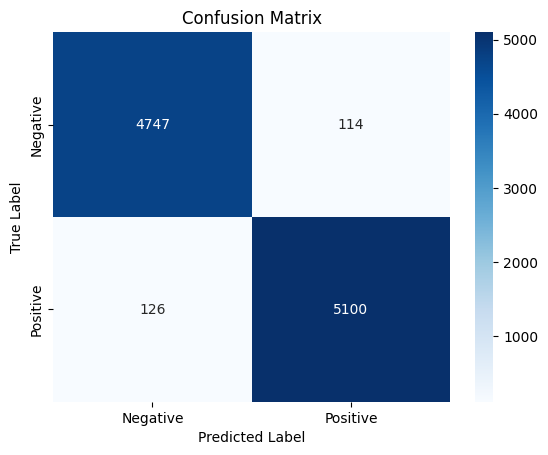

In [15]:
predictions = model.predict(test_data)

# Convert the predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, binary_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(test_labels, binary_predictions)
precision = precision_score(test_labels, binary_predictions)
recall = recall_score(test_labels, binary_predictions)
f1 = f1_score(test_labels, binary_predictions)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [63]:
import pickle
with open("/kaggle/working/bi_lstm_97.6.pkl", "wb") as file:
      pickle.dump(model,file)

In [75]:
# Tokenize the new text
sequences = toknize.texts_to_sequences(["why iam here iam hating my self  life is too hard to me, now its so hard to find friends all my friends leaves me and i cant handle that any more,I dont know are your parent help u in that thing because we are dont have good relationship with thim "])
pd_seq = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

# Assuming 'model' is your trained model, you can now make predictions
binary_prediction = model.predict(pd_seq)
binary_prediction

1/1 [==============================] - 0s 21ms/step


array([[0.20538387]], dtype=float32)

In [73]:
st="why iam here iam hating my self  life is too hard to me, now its so hard to find friends all my friends leaves me and i cant handle that any more,I dont know are your parent help u in that thing because we are dont have good relationship with thim"
len(st.split())

51

In [ ]:
r_df['label'].plot(kind='bar')

In [ ]:
r_df['label'].value_counts()

In [ ]:
padded_seq

In [ ]:
# Perform prediction
probability = model.predict_proba(padded_sequence)

# Output the probability for the first sample
print("Probability:", probability[0][0])

In [ ]:
model.predict("iam so sad i hope i dont die soon")

In [42]:
import json

# Save the tokenizer configuration to a JSON file
tokenizer_config = toknize.get_config()
tokenizer_json = json.dumps(tokenizer_config, indent=4)

# Specify the path where you want to save the tokenizer
tokenizer_path = 'tokenizer.json'

# Write the JSON string to the file
with open(tokenizer_path, 'w') as json_file:
    json_file.write(tokenizer_json)